In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### PCA - Used to reduce dimensions - Unsupervised learning
<pre>
1) Standardize the dataset.
2) Compute Covaraince Matrix from the Standardized dataset.
3) Compute Eigen values and eigen vectors from the Covaraince Matrix.
Arrange Eigen Vectors in decreasing order of Eigen values.

4) Select Feature matrix which is min number of eigen vectors required to generate the principal components.
5) Generate Pcincipal Components from the Feature matrix
</pre>

#### Read the dataset

In [8]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.shape

(1460, 81)

#### Data Preprocessing

#### Handle Null Values

In [10]:
def fetch_null_val(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Null_Count':nv.values,
                         '%Null':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('%Null',ascending=False)
    return nv_df

In [92]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null


In [12]:
df1 = df.copy()

In [13]:
cols = ['PoolQC','MiscFeature','Alley','Fence']
for i in cols:
    print(i,df[i].unique())

PoolQC [nan 'Ex' 'Fa' 'Gd']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley [nan 'Grvl' 'Pave']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [14]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [15]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
1,MasVnrType,872,59.726027
9,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
10,GarageType,81,5.547945
11,GarageYrBlt,81,5.547945
12,GarageFinish,81,5.547945
13,GarageQual,81,5.547945
14,GarageCond,81,5.547945
5,BsmtExposure,38,2.602740
7,BsmtFinType2,38,2.602740


In [16]:
nv_df['Feature'].values

array(['MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'MasVnrArea', 'Electrical'], dtype=object)

#### Basement related Features

In [17]:
cols = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    print(i,df[i].unique())

BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [18]:
cols = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    df[i] = df[i].fillna('No Basement')

#### Garege Related Faetures

In [19]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']  #  'GarageYrBlt'
for i in cols:
    print(i,df[i].unique())

GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [20]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
for i in cols:
    df[i] = df[i].fillna('No Garage')

In [21]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    print(df[i].value_counts())

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64


In [22]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [23]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,MasVnrType,872,59.726027
2,FireplaceQu,690,47.260274
3,GarageYrBlt,81,5.547945
1,Electrical,1,0.068493


In [24]:
df['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [25]:
df['GarageYrBlt'].nunique()

97

In [26]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

# df['GarageYrBlt'].mode()[0] or df['GarageYrBlt'].mode().max()

In [27]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [28]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [29]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,MasVnrType,872,59.726027
1,Electrical,1,0.068493


In [30]:
df.shape

(1460, 77)

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(588, 77)

In [33]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null


#### Duplicates

In [34]:
df.duplicated().sum()

0

In [35]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [36]:
df.drop('Id',axis=1,inplace=True)

In [37]:
df.shape

(588, 76)

In [38]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

### EDA

In [39]:
df['Utilities'].value_counts()

Utilities
AllPub    587
NoSeWa      1
Name: count, dtype: int64

In [40]:
df.drop('Utilities',axis=1,inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [41]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', '

In [42]:
for i in cat_cols:
    print(i,df[i].nunique())

MSZoning 4
Street 2
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 23
Condition1 9
Condition2 3
BldgType 5
HouseStyle 5
RoofStyle 5
RoofMatl 6
Exterior1st 10
Exterior2nd 12
MasVnrType 3
ExterQual 3
ExterCond 3
Foundation 4
BsmtQual 5
BsmtCond 4
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 3
HeatingQC 4
CentralAir 2
Electrical 3
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 4
GarageCond 4
PavedDrive 3
SaleType 7
SaleCondition 6


In [43]:
# df['Neighborhood'].value_counts()

In [44]:
cols = ['Street','CentralAir']
for i in cols:
    print(i)
    print(df[i].value_counts())

Street
Street
Pave    586
Grvl      2
Name: count, dtype: int64
CentralAir
CentralAir
Y    582
N      6
Name: count, dtype: int64


In [45]:
df.drop(['Street'],axis=1,inplace=True)

In [46]:
df.shape

(588, 74)

In [47]:
df['Condition2'].value_counts()

Condition2
Norm    585
PosN      2
RRAn      1
Name: count, dtype: int64

In [48]:
df.drop('Condition2',axis=1,inplace=True)

In [49]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


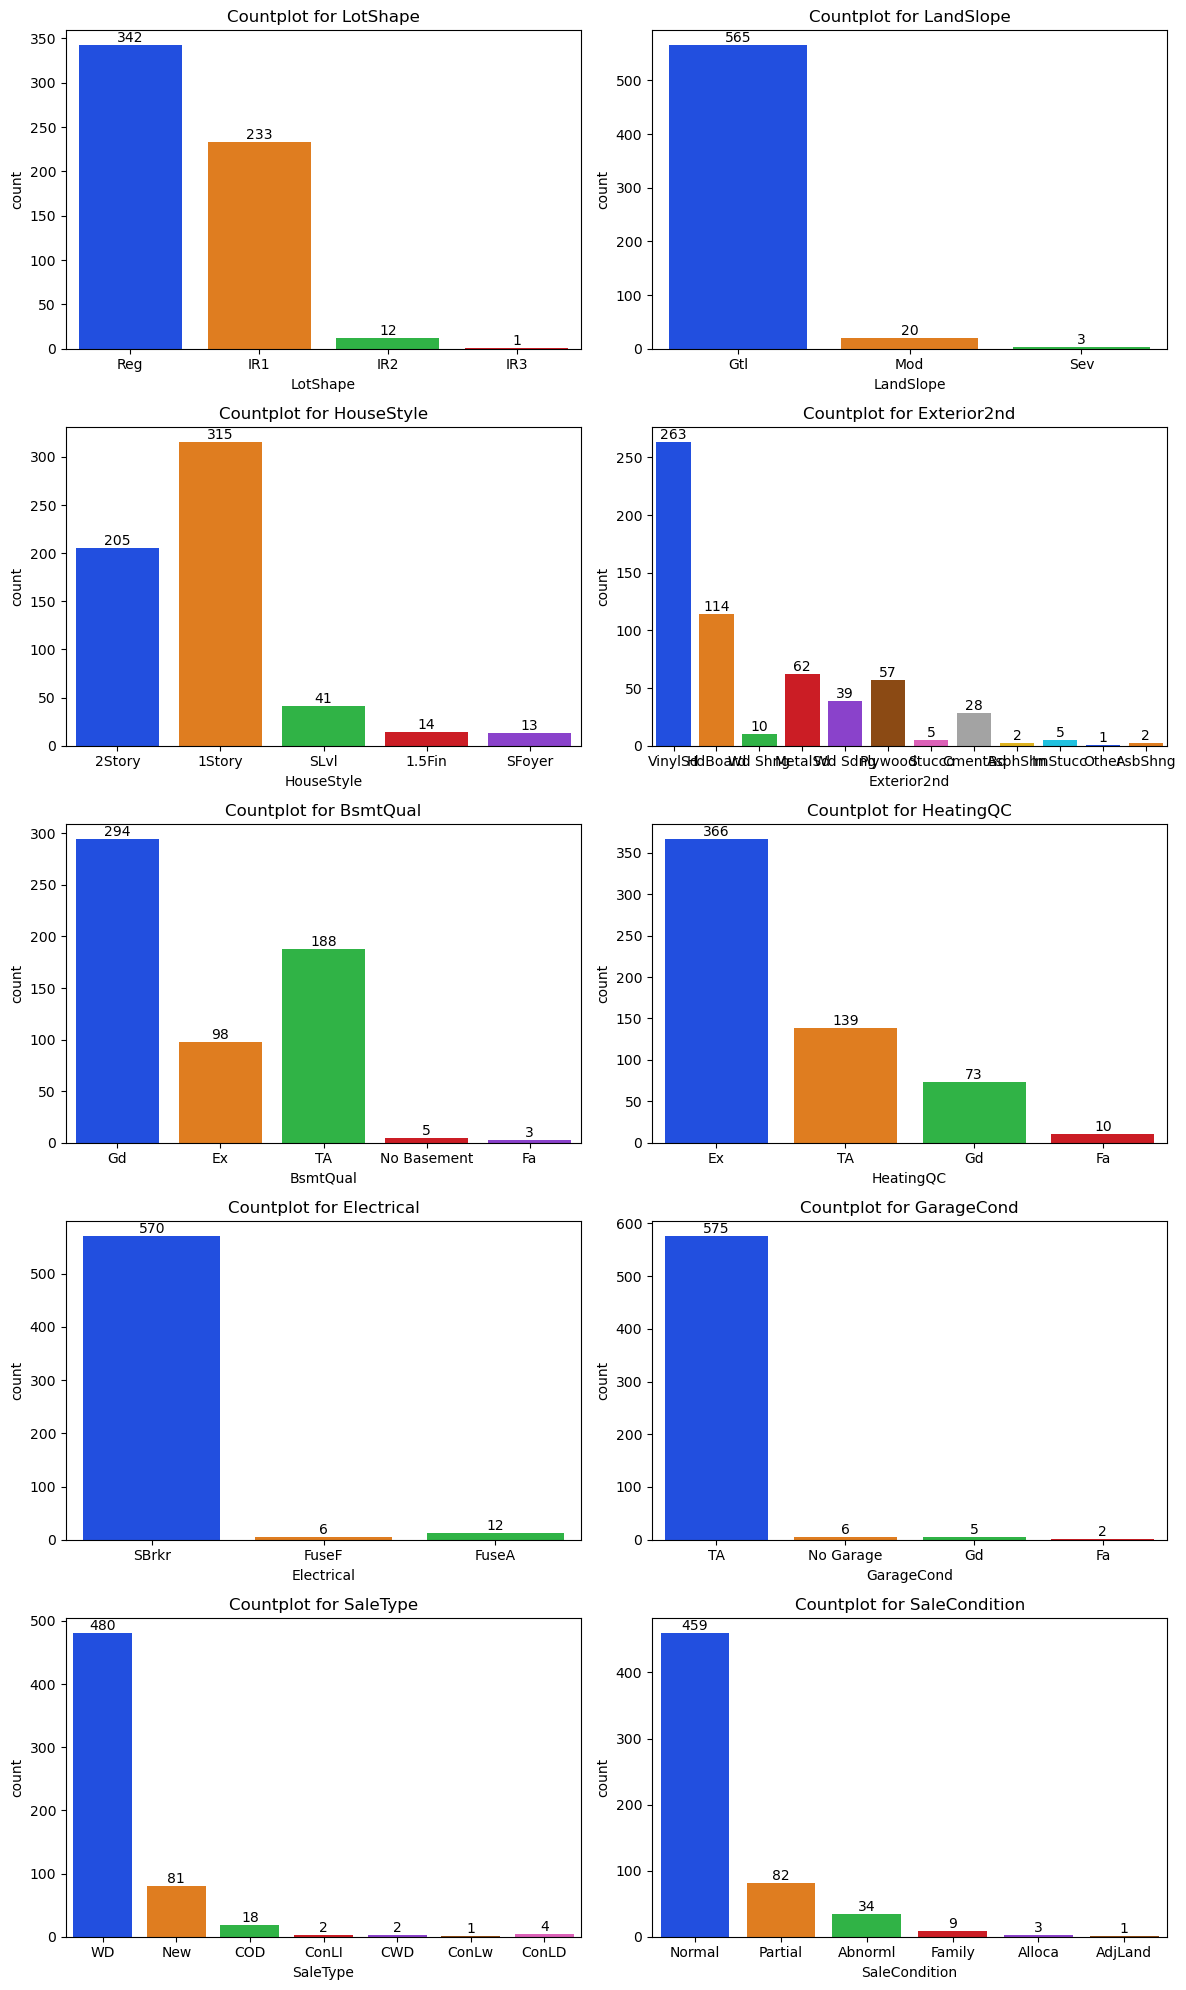

In [50]:
cols = ['LotShape','LandSlope','HouseStyle','Exterior2nd','BsmtQual',
        'HeatingQC','Electrical','GarageCond','SaleType', 'SaleCondition']

plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(5,2,i+1)
    ax = sns.countplot(x=df[cols[i]],palette='bright')
    plt.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [51]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

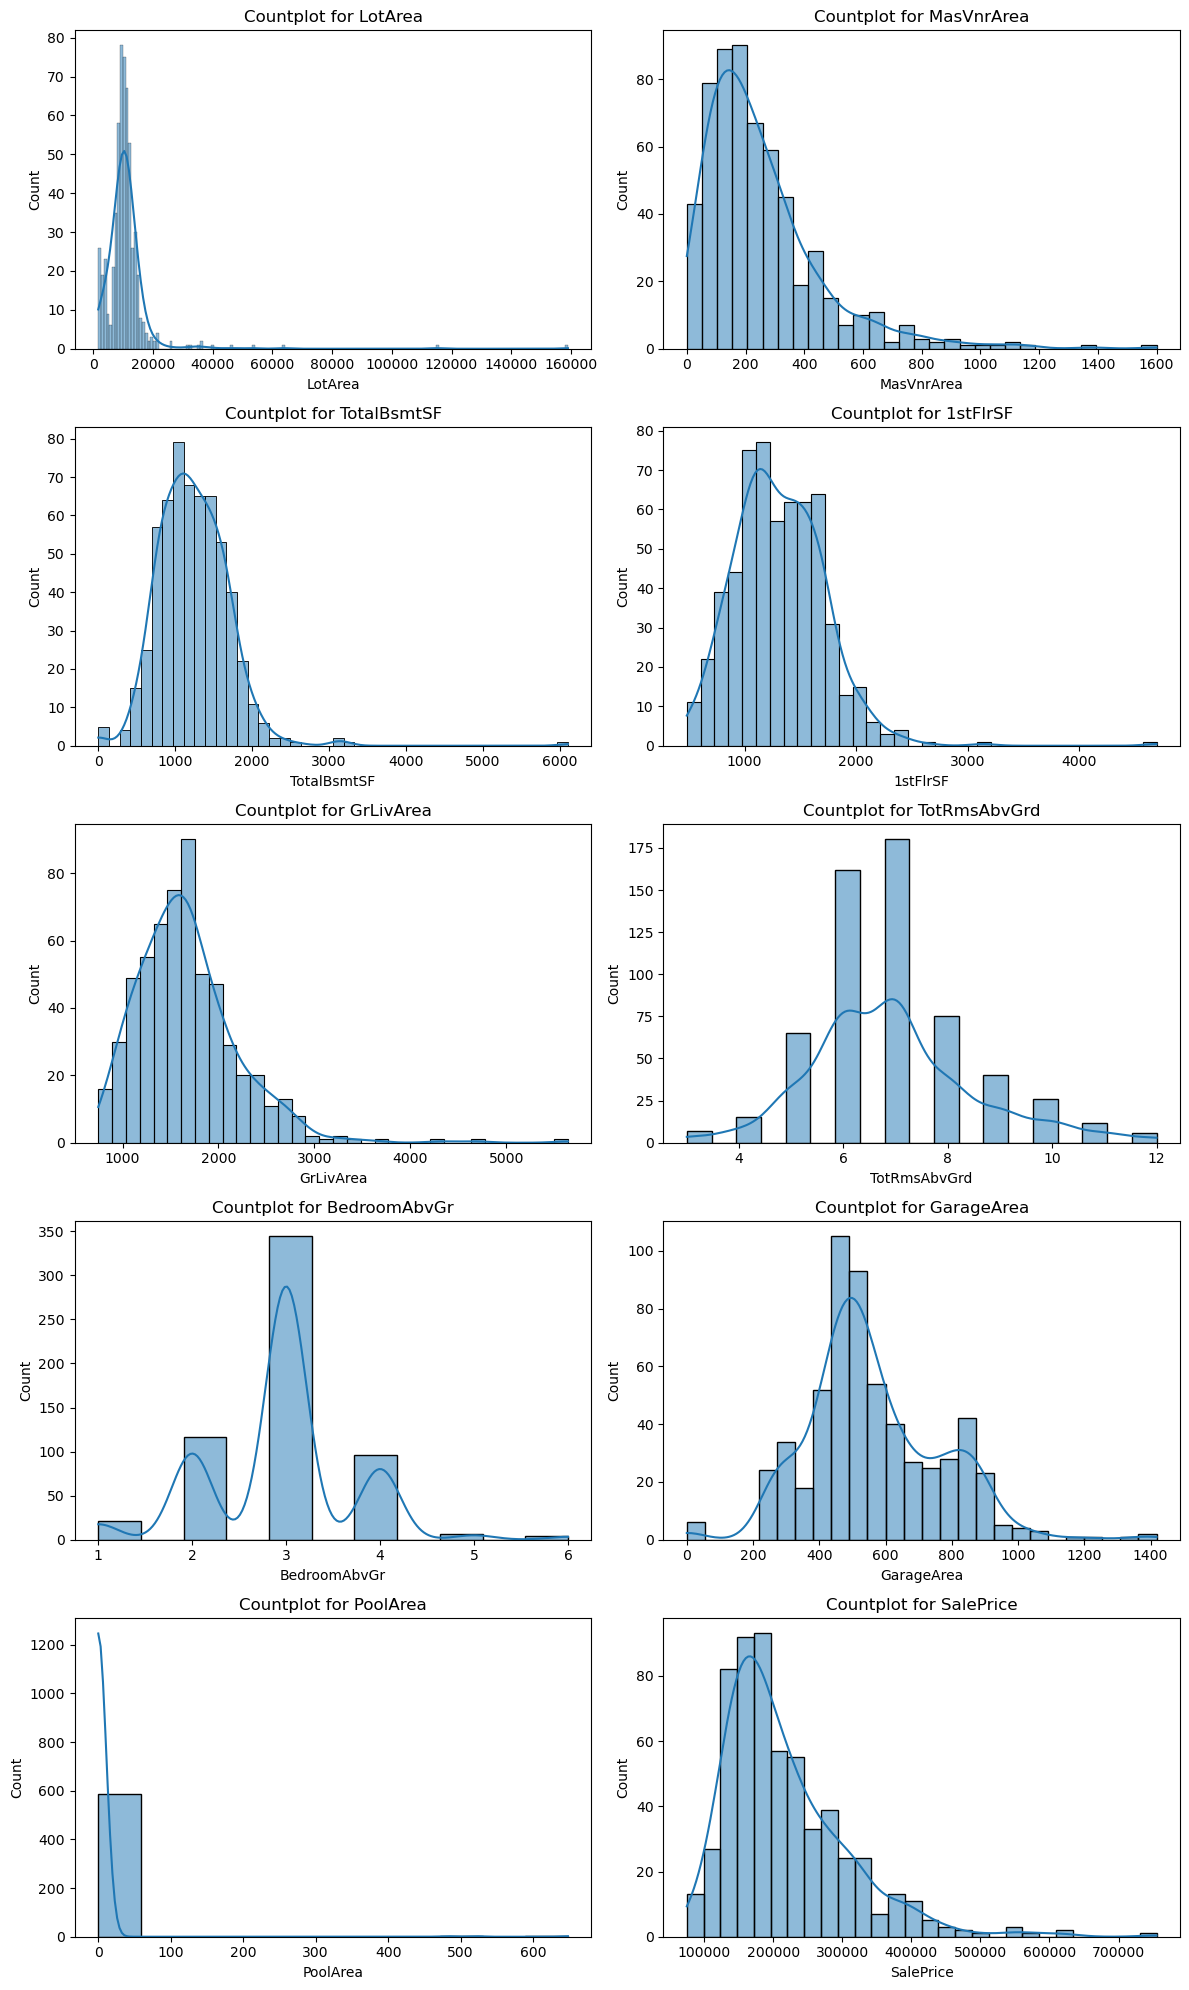

In [52]:
cols = ['LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea',
        'TotRmsAbvGrd','BedroomAbvGr','GarageArea','PoolArea', 'SalePrice']

plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(5,2,i+1)
    sns.histplot(x=df[cols[i]],kde=True)
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Corr

In [53]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


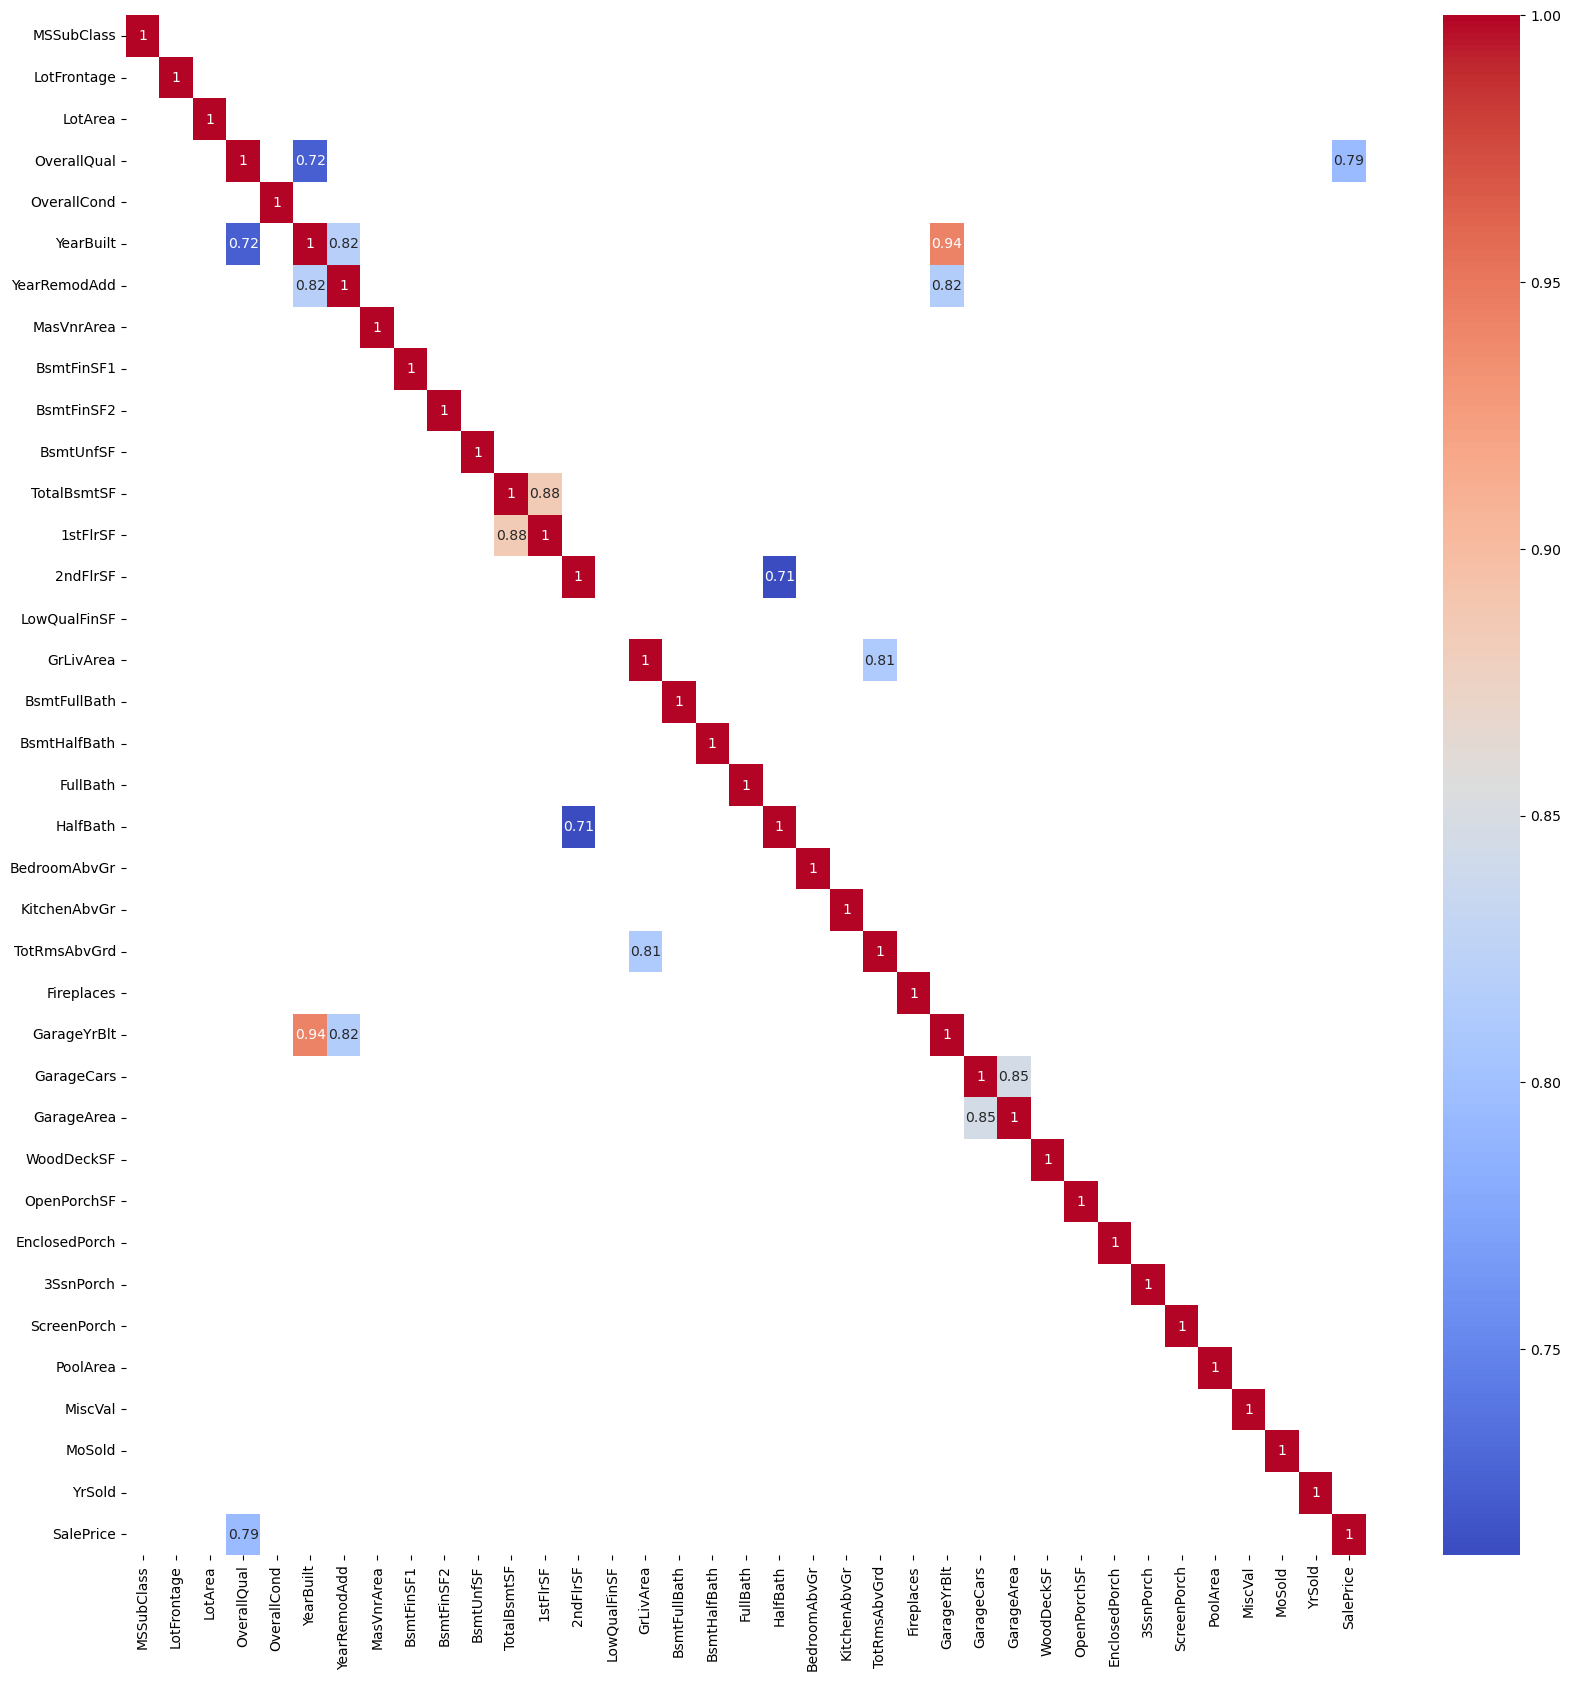

In [54]:
corr = df[num_cols].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='coolwarm')
plt.show()

#### Outlier Treatment

In [55]:
a = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T  # T = transpose
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,97%,98%,99%,max
MSSubClass,20.0,20.00,20.00,20.00,20.00,60.0,160.00,160.00,180.00,190.0
LotFrontage,21.0,21.00,21.00,24.00,34.00,70.0,112.17,120.00,129.13,313.0
LotArea,1680.0,1680.00,1912.20,2117.00,3003.50,10165.0,20475.07,26151.36,36967.22,159000.0
OverallQual,3.0,4.00,5.00,5.00,5.00,7.0,9.00,10.00,10.00,10.0
OverallCond,2.0,4.00,4.00,4.61,5.00,5.0,7.39,8.00,9.00,9.0
YearBuilt,1926.0,1938.74,1948.74,1952.61,1954.35,1995.0,2008.00,2009.00,2009.00,2010.0
YearRemodAdd,1950.0,1950.00,1953.00,1954.00,1958.00,1999.0,2009.00,2009.00,2009.00,2010.0
MasVnrArea,0.0,16.00,18.00,30.00,42.00,202.5,766.78,862.60,1033.08,1600.0
BsmtFinSF1,0.0,0.00,0.00,0.00,0.00,560.0,1456.95,1547.02,1705.23,5644.0
BsmtFinSF2,0.0,0.00,0.00,0.00,0.00,0.0,375.78,542.12,683.04,1474.0


In [56]:
# 10-12

In [57]:
print(df[df['SalePrice']<61691.5].shape)
print(df[df['GrLivArea']<692].shape)
print(df[df['LotArea']<1680.0].shape)
print(df[df['1stFlrSF']<520].shape)

# df['SalePrice'] = np.where(df['SalePrice']<61691.5,61691.5,df['SalePrice'])

(0, 73)
(0, 73)
(0, 73)
(8, 73)


In [58]:
df.shape

(588, 73)

In [59]:
cols_left_skewed = ['LotArea','1stFlrSF','GrLivArea','SalePrice']

def ot_left_skewed(x):
    x = x.clip(lower=x.quantile(0.01))
    return x

In [60]:
a.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [61]:
cols_right_skewed = ['LotFrontage','LotArea','MasVnrArea', 'BsmtFinSF1',
                     'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF','GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal','SalePrice']

def ot_right_skewed(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [62]:
df1 = df.copy()

In [63]:
df[cols_left_skewed] = df[cols_left_skewed].apply(ot_left_skewed)
df[cols_right_skewed] = df[cols_right_skewed].apply(ot_right_skewed)

In [64]:
a = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.097,0.98,0.99]).T  # T = transpose
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,9.7%,50%,98%,99%,max
MSSubClass,20.0,20.00,20.00,20.00,20.00,20.000,60.0,160.00,180.0000,190.00
LotFrontage,21.0,21.00,21.00,24.00,34.00,43.000,70.0,120.00,129.0169,129.13
LotArea,1680.0,1680.00,1912.20,2117.00,3003.50,4381.955,10165.0,26151.36,36560.7386,36967.22
OverallQual,3.0,4.00,5.00,5.00,5.00,5.000,7.0,10.00,10.0000,10.00
OverallCond,2.0,4.00,4.00,4.61,5.00,5.000,5.0,8.00,9.0000,9.00
YearBuilt,1926.0,1938.74,1948.74,1952.61,1954.35,1959.000,1995.0,2009.00,2009.0000,2010.00
YearRemodAdd,1950.0,1950.00,1953.00,1954.00,1958.00,1962.000,1999.0,2009.00,2009.0000,2010.00
MasVnrArea,0.0,16.00,18.00,30.00,42.00,68.000,202.5,862.60,1031.2704,1033.08
BsmtFinSF1,0.0,0.00,0.00,0.00,0.00,0.000,560.0,1547.02,1697.1999,1705.23
BsmtFinSF2,0.0,0.00,0.00,0.00,0.00,0.000,0.0,542.12,682.1352,683.04


In [65]:
df['House_Age'] = 2024 - df['YearBuilt']
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3S

In [66]:
df2 = df.copy()

In [67]:
df.drop('YearBuilt',axis=1,inplace=True)

In [68]:
df.shape

(588, 73)

In [69]:
from scipy.stats import shapiro
# Ho : data is normally  dist => p>0.05
# H1 : data is not normally dist => p<=0.05

In [70]:
test_stat,p = shapiro(df['SalePrice'])
print(test_stat)
print(p)

0.902510404586792
6.534882969509538e-19


In [71]:
test_stat1,p1 = shapiro(np.log(df['SalePrice']))
print(test_stat1)
print(p1)

0.9873901009559631
5.8332552725914866e-05


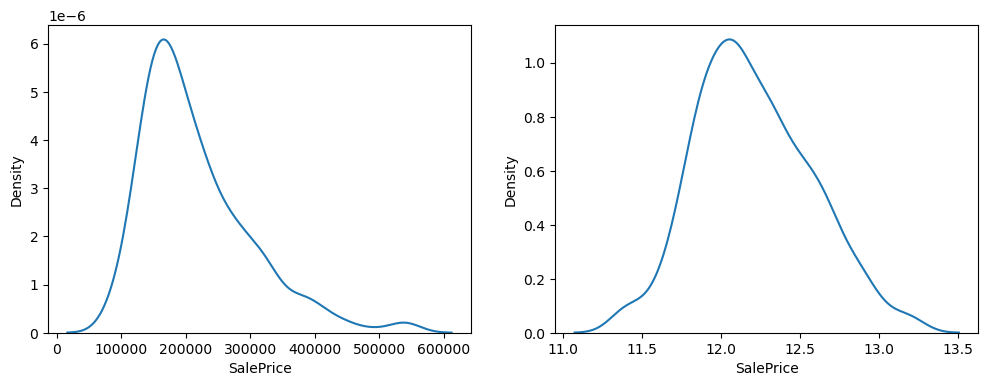

In [72]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(x=df['SalePrice'])
plt.subplot(1,2,2)
sns.kdeplot(x=np.log(df['SalePrice']))
plt.show()

In [73]:
print(p)  # 7.46*10^(-29) = 0.0000000000000000000000000000746
print(p1) # 8.08*10^(-7)  = 0.000000808

6.534882969509538e-19
5.8332552725914866e-05


#### Encoding Catgeorical Features

In [74]:
cat_cols  = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [75]:
for i in cat_cols:
  print(i,df[i].nunique())

MSZoning 4
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 23
Condition1 9
BldgType 5
HouseStyle 5
RoofStyle 5
RoofMatl 6
Exterior1st 10
Exterior2nd 12
MasVnrType 3
ExterQual 3
ExterCond 3
Foundation 4
BsmtQual 5
BsmtCond 4
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 3
HeatingQC 4
CentralAir 2
Electrical 3
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 4
GarageCond 4
PavedDrive 3
SaleType 7
SaleCondition 6


In [76]:
# Removing:  Neighborhood, Exterior1st , Exterior2nd
cat_cols1 = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
        'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']

In [77]:
df_dum = pd.get_dummies(data=df,columns= cat_cols1,drop_first=True)
# NeighborHood, 'Exterior1st', 'Exterior2nd'
print(df_dum.shape)
print(df_dum.columns)

(588, 162)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=162)


#### Select x and y

In [78]:
x = df_dum.drop(['SalePrice','Neighborhood', 'Exterior1st', 'Exterior2nd'],axis=1)
y = np.log(df_dum['SalePrice'])
print(x.shape)
print(y.shape)

(588, 158)
(588,)


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(411, 158)
(177, 158)
(411,)
(177,)


In [81]:
from sklearn.metrics import *

In [82]:
def eval_model(ytest,ypred):
    mae =  mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse,'RMSE',rmse)
    print('R2_Score',r2)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [85]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 0.11585363856499153
MSE 0.0366995765181596 RMSE 0.19157133532488518
R2_Score 0.7555646353928014


In [86]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.9545527759731671
Test Score 0.7555646353928014


#### Inference
Model is highly overfit

### PCA

In [87]:
print(x_train.shape)
print(x_test.shape)

(411, 158)
(177, 158)


In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()

x_train_sc  = sc.fit_transform(x_train)
x_test_sc  = sc.transform(x_test)
print(x_train_sc.shape)
print(x_test_sc.shape)

(411, 158)
(177, 158)


In [90]:
pca = PCA()
pca.fit(x_train_sc)

x_train_pcomps = pca.transform(x_train_sc)
x_test_pcomps = pca.transform(x_test_sc)

In [91]:
print(x_train_pcomps.shape)
print(x_test_pcomps.shape)

(411, 158)
(177, 158)


#### Extract Eigen Values and Eigen Vectors

In [93]:
eig_val = pca.explained_variance_  # eigen_value
print(len(eig_val))
eig_df = pd.DataFrame({'Variance(Eig_Val)': eig_val,
                      'EVR': (pca.explained_variance_ratio_)*100})

# EVR = explained_variance_ratio_
eig_df.head()

158


,Variance(Eig_Val),EVR
0,14.556021,9.616294
1,7.423544,4.904293
2,7.237932,4.781670
3,6.666698,4.404290
4,6.083890,4.019263


In [94]:
eig_df['CumSum_EVR'] = np.cumsum(eig_df['EVR'])
eig_df.head()

,Variance(Eig_Val),EVR,CumSum_EVR
0,14.556021,9.616294,9.616294
1,7.423544,4.904293,14.520587
2,7.237932,4.781670,19.302257
3,6.666698,4.404290,23.706547
4,6.083890,4.019263,27.725810


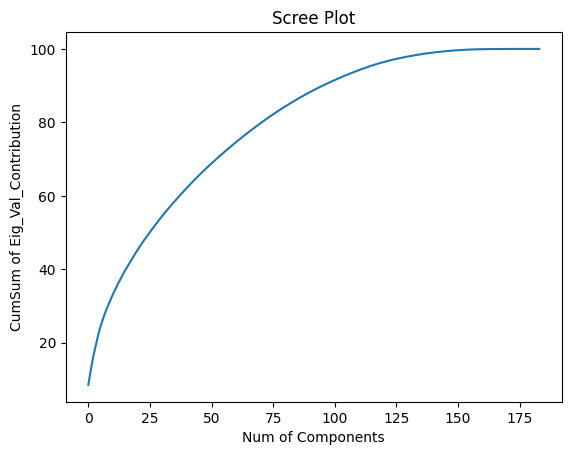

In [ ]:
plt.plot(list(range(len(eig_df))),eig_df['CumSum_EVR'])
plt.title('Scree Plot')
plt.xlabel('Num of Components')
plt.ylabel('CumSum of Eig_Val_Contribution')
plt.show()

In [95]:
eig_df.columns # 75

Index(['Variance(Eig_Val)', 'EVR', 'CumSum_EVR'], dtype='object')

In [96]:
eig_df[eig_df['CumSum_EVR']>=74].head(10)

,Variance(Eig_Val),EVR,CumSum_EVR
39,1.155008,0.763045,74.398114
40,1.148210,0.758554,75.156668
41,1.137194,0.751276,75.907944
42,1.115184,0.736735,76.644679
43,1.082006,0.714817,77.359496
44,1.060135,0.700368,78.059864
45,1.040376,0.687315,78.747179
46,1.014430,0.670174,79.417352
47,0.975661,0.644561,80.061913
48,0.967415,0.639114,80.701027


#### Inference
41 PC have cumulative varaince of 75%. Hence out of 158, we need atleast 41PCs.

In [97]:
pc_cols = ['PC'+str(i) for i in range(1,159)]
len(pc_cols)

158

In [98]:
print(x_train_pcomps.shape)

(411, 158)


In [99]:
x_train_pcomps_df = pd.DataFrame(x_train_pcomps,columns = pc_cols)
x_test_pcomps_df = pd.DataFrame(x_test_pcomps,columns = pc_cols)
print(x_train_pcomps_df.shape)
print(x_test_pcomps_df.shape)

(411, 158)
(177, 158)


#### Select 80 features from x_train_pcomps and 80 features from x_test_pcomps

In [100]:
x_train_pcomps_df = x_train_pcomps_df.iloc[:,:62]
x_test_pcomps_df = x_test_pcomps_df.iloc[:,:62]
print(x_train_pcomps_df.shape) # => Independent features for train data
print(x_test_pcomps_df.shape)  # => Independent features for test data

(411, 62)
(177, 62)


#### Linear Regression after PCA

In [101]:
lr2 = LinearRegression()
lr2.fit(x_train_pcomps_df,y_train)

LinearRegression()

In [102]:
ypred_lr2 = lr2.predict(x_test_pcomps_df)
eval_model(y_test,ypred_lr2)

MAE 0.10040175888944289
MSE 0.028443606730202724 RMSE 0.16865232500681016
R2_Score 0.8105530351719292


In [103]:
print('Train Score', lr2.score(x_train_pcomps_df,y_train))
print('Test Score', lr2.score(x_test_pcomps_df,y_test))

Train Score 0.8995072513274585
Test Score 0.8105530351719292


In [104]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.9545527759731671
Test Score 0.7555646353928014


In [105]:
#### PCA - Cons
# 1) Overfitting reduces.
# 2) Time minimise complexity.

#### Loadings Matrix

In [106]:
eig_vec = pca.components_
print(eig_vec.shape)

(158, 158)


In [107]:
loadings_matrix = pd.DataFrame(eig_vec.T*np.sqrt(eig_val),columns=pc_cols,index=x_train.columns)
loadings_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158
MSSubClass,0.119234,-0.501789,0.243864,-0.122887,0.327168,-0.049073,0.361604,-0.082677,-0.038734,-0.047463,...,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
LotFrontage,-0.177325,0.588462,-0.176992,0.180796,-0.110497,0.115710,-0.276571,-0.076039,-0.112915,-0.141581,...,8.073036e-33,1.362881e-32,5.559181e-33,1.229336e-32,1.284217e-32,-4.500248e-32,2.809911e-32,-7.071951e-33,8.752318e-33,-5.333228e-33
LotArea,-0.118818,0.689485,-0.231198,0.209704,-0.083762,-0.094026,0.138881,0.267347,0.086710,0.014239,...,-1.988600e-32,3.399375e-32,1.276118e-32,3.599170e-33,-3.463338e-32,-4.600225e-32,4.777007e-33,1.715184e-32,2.375403e-32,-1.126760e-33
OverallQual,-0.836452,0.099094,-0.018519,0.106425,0.061210,-0.012886,0.045700,-0.121794,-0.109945,-0.033307,...,1.458269e-32,-6.792645e-32,-5.717733e-32,-4.711956e-32,-5.309037e-32,-2.163555e-32,1.863546e-33,-8.752361e-33,-1.156238e-32,4.187340e-32
OverallCond,0.258473,0.096850,-0.293258,-0.096198,0.076920,-0.151027,-0.025651,0.017980,0.257900,-0.170217,...,-3.013608e-32,-6.562000e-32,-5.947105e-32,2.607383e-32,2.082322e-32,-1.107537e-32,1.183208e-32,7.405106e-33,-4.095623e-32,-5.863615e-33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.114962,-0.144651,0.057336,0.631668,0.059616,-0.138408,0.079296,-0.137122,0.259535,-0.060913,...,-1.402095e-18,3.319143e-18,2.029277e-18,2.628839e-18,1.768850e-18,3.511489e-18,2.864086e-20,5.950365e-34,-9.021549e-19,-4.482782e-18
SaleCondition_Alloca,0.056475,-0.051004,0.015876,-0.038574,-0.033037,0.148296,0.185618,0.104198,0.030266,0.020232,...,-7.531327e-17,6.256546e-17,-2.599989e-17,-4.977098e-17,-8.909904e-18,2.338890e-17,5.205434e-18,-5.632158e-32,3.096316e-17,-3.254901e-18
SaleCondition_Family,0.073592,-0.050586,0.018562,-0.005946,-0.036059,0.109424,0.058928,0.058816,0.022671,0.011114,...,3.512389e-33,-1.716406e-32,2.634291e-33,1.404955e-32,-8.012637e-33,-3.073340e-33,-2.414767e-32,3.084966e-33,5.995927e-34,2.324741e-33
SaleCondition_Normal,0.366947,0.005392,-0.100373,-0.152147,0.110341,-0.517869,-0.068401,0.272540,-0.297200,0.092166,...,7.463826e-33,-1.865956e-33,-1.668385e-32,-1.229336e-32,2.436720e-32,-2.283053e-32,-4.390486e-33,-8.214068e-33,-1.918697e-32,-5.469978e-33


In [108]:
### PCA
# 1) Eigen Decomposition of Covariance Matrix
# 2) SVD

### PCA using SVD (Singular Value Decomposition)

In [109]:
from scipy.linalg import svd

#### SVD
A(n * m) = U(n * n) * sigma(n * m) * VT(m * m)

A  => matrix for which we need to compute covariace matrix

Covariance = X * XT /(n-1),   where T = transpose

In [110]:
# Ex:
# A(2*3) = U(2*2) * sigma(2*3) * VT(3*3)

In [111]:
a = np.array([[1,2,3],[4,5,6]])
u, sigma, vt = svd(a)
print(u)
print(sigma)
print(vt)

[[-0.3863177   0.92236578]
 [-0.92236578 -0.3863177 ]]
[9.508032   0.77286964]
[[-0.42866713 -0.56630692 -0.7039467 ]
 [-0.80596391 -0.11238241  0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


In [112]:
sigma1 = np.array([[9.508032,0,0],[0,0.77286964,0]])
sigma1

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [113]:
res = np.dot(np.dot(u,sigma1),vt)
print(res)

[[1. 2. 3.]
 [4. 5. 6.]]
